# AMAZON FINE FOOD REVIEW ANALYSIS

We are here to identify relation among data, and find answers to our problems by performing data visualization.
Also we will extract some important facts that will be useful to grow business and know the customer satisfaction closely.

Team includes:-

Mr.Mayur Ghugare    (18BCS1362)

Mr.Sahil Patharia   (18BCS1363)

Mr.Akshay Singh     (18BCS1368)

Mr.Amanjot Singh    (18BCS1387)

In [1]:
#importing essentials libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

Reading csv file for our analysis

In [2]:
df=pd.read_csv("C:/gallary/course/Datasets/Reviews.csv")

In [3]:
df.shape

(568454, 10)

So we have total 568454 rows and 10 columns. This is a large dataset, it might take some time to perform operation on the data set. 

In [4]:
#we seperated the product_id column from the dataframe to perform operation on this column.
product_id=df["ProductId"]

Here we are trying to get the seperate list of Product_Id to explore the products and bring out some interesting facts.

In [5]:
#printing first 10 rows of product_id
print(product_id.head(10))
#confirming that we got full column
len(product_id)

0    B001E4KFG0
1    B00813GRG4
2    B000LQOCH0
3    B000UA0QIQ
4    B006K2ZZ7K
5    B006K2ZZ7K
6    B006K2ZZ7K
7    B006K2ZZ7K
8    B000E7L2R4
9    B00171APVA
Name: ProductId, dtype: object


568454

In [6]:
#Now to know the unique products that have been sold on amazon we used set() 
len(set(product_id))


74258

Amazon have sold 74258 unique food item. Cant believe these is an huge number.

#### Statement:  How much time does each product have been purchased/sold on amazon?

In [7]:
#using value_counts() from panda library, we find the frequency of every product sold/purchased
count_product_id=product_id.value_counts()

In [8]:
count_product_id.head(5)

B007JFMH8M    913
B002QWHJOU    632
B0026RQTGE    632
B002QWP8H0    632
B002QWP89S    632
Name: ProductId, dtype: int64

In [9]:
count_product_id.shape

(74258,)

In [10]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [12]:

!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [13]:
from textblob import TextBlob

Checking the polarity of the column summary

TextBlob().sentiment.polarity will give us either of the 3 values for given sentence i.e.,(-1,0,1)

If it is -1 then sentence or comment is negative 

If it is 0 then sentence or comment is neutral 

If it is +1 then sentence or comment is positive

In [14]:
TextBlob("Great taffy").sentiment.polarity
#It is a positive comment 

0.8

In [15]:
TextBlob("Not as Advertised").sentiment.polarity
#It is a neutral comment

0.0

In [17]:
TextBlob("disappointed").sentiment.polarity
#It is a negative comment

-0.75

Finding the polarity of every comment in the dataframe df

Running a for loop over the "Summary" column 

If no comment then except the exception and add 0 as default

In [19]:
polarityy=[]
for i in df["Summary"]:
    try:
        polarityy.append(TextBlob(i).sentiment.polarity)
    except:
        polarityy.append(0)

In [21]:
df["polarity"]=polarityy

In [23]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.70
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.80
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-0.75
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.50


## Exploratory Data Analysis

EDA on positive polarity/comment

In [27]:
pos_polarity=df[df["polarity"]>0]
pos_polarity.count()

Id                        331665
ProductId                 331665
UserId                    331665
ProfileName               331657
HelpfulnessNumerator      331665
HelpfulnessDenominator    331665
Score                     331665
Time                      331665
Summary                   331665
Text                      331665
polarity                  331665
dtype: int64

We seperate out the records that have polarity greater than 0 that means positive polarity.

To our notice we got 331665 positive comments out of 568454

In [29]:
join_pos_comnts=(" ".join(pos_polarity["Summary"]))
len(join_pos_comnts)

8465012

In [34]:
from wordcloud import WordCloud,STOPWORDS
#!pip install wordcloud

(-0.5, 999.5, 499.5, -0.5)

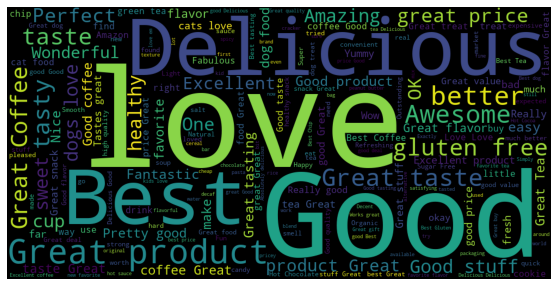

In [35]:
pos_wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(join_pos_comnts)
plt.figure(figsize=(15,5))
plt.imshow(pos_wordcloud)
plt.axis("off")

EDA on negative comments/polarity

In [36]:
neg_polarity=df[df["polarity"]<0]
neg_polarity.count()

Id                        52516
ProductId                 52516
UserId                    52516
ProfileName               52516
HelpfulnessNumerator      52516
HelpfulnessDenominator    52516
Score                     52516
Time                      52516
Summary                   52516
Text                      52516
polarity                  52516
dtype: int64

Here we sepearted out the negative cooments 

And surprisingly we got 52516 negative comments

In [38]:
join_neg_comnts=(" ".join(neg_polarity["Summary"]))
len(join_neg_comnts)

1438541

(-0.5, 999.5, 499.5, -0.5)

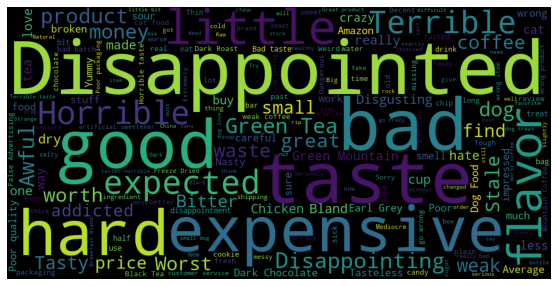

In [39]:
pos_wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(join_neg_comnts)
plt.figure(figsize=(15,5))
plt.imshow(pos_wordcloud)
plt.axis("off")